<h1>Phase 1<br>Data Collection and Exploratory Data Analysis</h1>
contains 3 steps

<h3>Step 1 - Data Import and Preprocessing</h3>

In [324]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy import stats

In [325]:
data=pd.read_csv('Food_Delivery_Time_prediction.csv')
d=data.copy()
d.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [326]:
d.isnull().sum()

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64

Null values do not exist in any column<br>
Now checking for incorrect data

In [327]:
#drop duplicate and empty rows of Order_ID column
d.dropna(subset=['Order_ID'])
d.drop_duplicates(subset='Order_ID', keep='first')
# drop incorrect data for Order_ID column
d.drop(d[ d['Order_ID'].str.match(r'^ORD\d{4}$')==False ].index, inplace=True) 
# here if inplace=True not used then the changes will not be applied to the original dataframe 

#drop rows with null values in Customer_Location column
d.dropna(subset=['Customer_Location'], inplace=True)

#drop rows with null values in Restaurant_Location column
d.dropna(subset=['Restaurant_Location'], inplace=True)

# # distance values all greater than 0
# d.loc[d['Distance']<=0,'Distance']=np.mean(d[d['Distance']>0]['Distance'])

# fill null values in Weather_Conditions with 'Sunny'
# Weather_Conditions values should be one of the following
d['Weather_Conditions'].fillna('Sunny')
valid_weather_conditions = ['Sunny', 'Rainy', 'Snowy', 'Cloudy']
d.loc[~d['Weather_Conditions'].isin(valid_weather_conditions), 'Weather_Conditions'] = 'Sunny'

# fill null values in Traffic_Conditions with 'Medium'
# Traffic_Conditions values should be one of the following
d['Traffic_Conditions'].fillna('Medium')
valid_traffic_conditions = ['Low', 'Medium', 'High']
d.loc[~d['Traffic_Conditions'].isin(valid_traffic_conditions), 'Traffic_Condisions'] = 'Medium'

# # Deliver_Person_Experience values should be positive and non-zero
# d.loc[d['Delivery_Person_Experience']<=0,'Delivery_Person_Experience']=np.mean(d.loc[d['Delivery_Person_Experience']>0,'Delivery_Person_Experience'])

# fill null values in Order_Priority with 'Medium'
# Order_Priority values should be one of the following
d['Order_Priority'].fillna('Medium')
valid_order_priority = ['Low', 'Medium', 'High']
d.loc[~d['Order_Priority'].isin(valid_order_priority), 'Order_Priority'] = 'Medium'

# fill null values in Order_Time with 'Night'
# Order_Time values should be one of the following
d['Order_Time'].fillna('Night')
valid_order_time = ['Afternoon', 'Night', 'Evening', 'Morning']
d.loc[~d['Order_Time'].isin(valid_order_time), 'Order_Time'] = 'Night'

# fill null values in Vehicle_Type with 'Bike'
# Vehicle_Type values should be one of the following
d['Vehicle_Type'].fillna('Bike')
valid_vehicle_type = ['Car', 'Bike', 'Bicycle']
d.loc[~d['Vehicle_Type'].isin(valid_vehicle_type), 'Vehicle_Type'] = 'Bike'

# # Restaurant_Rating values all greater than 0
# d.loc[d['Restaurant_Rating']<=0,'Restaurant_Rating']=np.mean(d[d['Restaurant_Rating']>0]['Restaurant_Rating'])
# # Restaurant_Rating values all should be less than or equal to 5
# d.loc[d['Restaurant_Rating']>5,'Restaurant_Rating']=np.mean(d[(d['Restaurant_Rating'] >= 2.5) & (d['Restaurant_Rating'] < 5)]['Restaurant_Rating'])

# # Customer_Rating values all greater than 0
# d.loc[d['Customer_Rating']<=0,'Customer_Rating']=np.mean(d[d['Customer_Rating']>0]['Customer_Rating'])
# # Customer_Rating values all should be less than or equal to 5
# d.loc[d['Customer_Rating']>5,'Customer_Rating']=np.mean(d[(d['Customer_Rating'] >= 2.6) & (d['Customer_Rating'] < 5)]['Customer_Rating'])

# # Delivery_Time values all greater than 0
# d.loc[d['Delivery_Time']<=0,'Delivery_Time']=np.mean(d[d['Delivery_Time']>0]['Delivery_Time'])

# # Order_Cost values all greater than 0
# d.loc[d['Order_Cost']<=0,'Order_Cost']=np.mean(d[d['Order_Cost']>0]['Order_Cost'])

# # Tip_Amount values all greater than 0
# d.loc[d['Tip_Amount']<=0,'Tip_Amount']=np.mean(d[d['Tip_Amount']>0]['Tip_Amount'])


In [328]:
d

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Traffic_Condisions
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54,NaN
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02,NaN
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17,NaN
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23,NaN
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,Cloudy,High,8,Medium,Night,Bike,4.7,4.0,50.39,1432.26,66.34,NaN
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,Snowy,Medium,8,Low,Night,Bicycle,3.0,3.6,90.54,1720.25,40.27,NaN
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,Snowy,High,4,Medium,Afternoon,Bike,2.9,3.4,73.20,1356.58,5.10,NaN
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,Rainy,High,9,Low,Night,Car,3.9,4.8,53.94,354.39,85.25,NaN


In [329]:
# Setting numeric values to column Weather_Conditions
weather_map = {'Sunny': 0, 'Rainy': 1, 'Snowy': 2, 'Cloudy': 3}
d['Weather_Conditions'] = d['Weather_Conditions'].map(weather_map)

# Setting numeric values to column Traffic_Conditions
traffic_map = {'Low': 0, 'Medium': 1, 'High': 2}
d['Traffic_Conditions'] = d['Traffic_Conditions'].map(traffic_map)

# Setting numeric values to column Order_Priority
order_priority_map = {'Low': 0, 'Medium': 1, 'High': 2}
d['Order_Priority'] = d['Order_Priority'].map(order_priority_map)

# Setting numeric values to column Order_Time
order_time_map = {'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3}
d['Order_Time'] = d['Order_Time'].map(order_time_map)

# Setting numeric values to column Vehicle_Type
vehicle_type_map = {'Bicycle': 0, 'Bike': 1, 'Car': 2}
d['Vehicle_Type'] = d['Vehicle_Type'].map(vehicle_type_map)

In [330]:
d

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Traffic_Condisions
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,1,4,1,1,2,4.1,3.0,26.22,1321.10,81.54,NaN
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,3,1,8,0,3,2,4.5,4.2,62.61,152.21,29.02,NaN
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,1,9,2,3,1,3.3,3.4,48.43,1644.38,64.17,NaN
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,3,0,2,1,2,1,3.2,3.7,111.63,541.25,79.23,NaN
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,2,6,0,3,1,3.5,2.8,32.38,619.81,2.34,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,3,2,8,1,3,1,4.7,4.0,50.39,1432.26,66.34,NaN
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,2,1,8,0,3,0,3.0,3.6,90.54,1720.25,40.27,NaN
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,2,2,4,1,1,1,2.9,3.4,73.20,1356.58,5.10,NaN
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,1,2,9,0,3,2,3.9,4.8,53.94,354.39,85.25,NaN


In [331]:
# Standardization
s=StandardScaler()
d['Distance_Scaled'] = s.fit_transform(d[['Distance']])
d['Delivery_Time_Scaled'] = s.fit_transform(d[['Delivery_Time']])
d['Order_Cost_Scaled'] = s.fit_transform(d[['Order_Cost']])
# StandardScaler().fit_transform() expects a 2D array or DataFrame, but you passed a Series (d['Distance']), which is 1D.
# So pass a DataFrame with double brackets d[['Distance']]

In [332]:
d

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Traffic_Condisions,Distance_Scaled,Delivery_Time_Scaled,Order_Cost_Scaled
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,1,4,1,1,2,4.1,3.0,26.22,1321.10,81.54,NaN,-1.454738,-1.487932,0.501852
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,3,1,8,0,3,2,4.5,4.2,62.61,152.21,29.02,NaN,1.439192,-0.264987,-1.634294
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,1,9,2,3,1,3.3,3.4,48.43,1644.38,64.17,NaN,-0.666417,-0.741529,1.092646
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,3,0,2,1,2,1,3.2,3.7,111.63,541.25,79.23,NaN,0.335835,1.382411,-0.923323
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,2,6,0,3,1,3.5,2.8,32.38,619.81,2.34,NaN,-0.700119,-1.280915,-0.779755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,3,2,8,1,3,1,4.7,4.0,50.39,1432.26,66.34,NaN,1.805512,-0.675660,0.704997
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,2,1,8,0,3,0,3.0,3.6,90.54,1720.25,40.27,NaN,-0.792431,0.673647,1.231298
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,2,2,4,1,1,1,2.9,3.4,73.20,1356.58,5.10,NaN,1.335157,0.090908,0.566692
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,1,2,9,0,3,2,3.9,4.8,53.94,354.39,85.25,NaN,1.840679,-0.556356,-1.264810


<h3>Step 2 - Exploratory Data Analysis (EDA)</h3>

In [333]:
# keepdims=True makes sure the result is always an array, even if there is only one mode.
# Without keepdims=True, the output might be a scalar if the input is 1D, which can sometimes cause issues in further processing.

dist_mean=np.mean(d['Distance'])
dist_mode=stats.mode(d['Distance'], keepdims=True).mode[0]
dist_median=np.median(d['Distance'])
dist_var=np.var(d['Distance'])

weather_mode = stats.mode(d['Weather_Conditions'], keepdims=True).mode[0]
weather_median = np.median(d['Weather_Conditions'])

Traffic_mode = stats.mode(d['Traffic_Conditions'], keepdims=True).mode[0]
Traffic_median = np.median(d['Traffic_Conditions'])

delivery_person_experience_mean=np.mean(d['Delivery_Person_Experience'])
delivery_person_experience_mode=stats.mode(d['Delivery_Person_Experience'], keepdims=True).mode[0]
delivery_person_experience_median=np.median(d['Delivery_Person_Experience'])
delivery_person_experience_var=np.var(d['Delivery_Person_Experience'])

Order_priority_mode = stats.mode(d['Order_Priority'], keepdims=True).mode[0]
Order_priority_median = np.median(d['Order_Priority'])

Order_time_mode = stats.mode(d['Order_Time'], keepdims=True).mode[0]
Order_time_median = np.median(d['Order_Time'])

Vehicle_Type_mode = stats.mode(d['Vehicle_Type'], keepdims=True).mode[0]
Vehicle_Type_median = np.median(d['Vehicle_Type'])

restaurant_rating_mean=np.mean(d['Restaurant_Rating'])
restaurant_rating_mode=stats.mode(d['Restaurant_Rating'], keepdims=True).mode[0]
restaurant_rating_median=np.median(d['Restaurant_Rating'])
restaurant_rating_var=np.var(d['Delivery_Person_Experience'])

customer_rating_mean=np.mean(d['Customer_Rating'])
customer_rating_mode=stats.mode(d['Customer_Rating'], keepdims=True).mode[0]
customer_rating_median=np.median(d['Customer_Rating'])
customer_rating_var=np.var(d['Customer_Rating'])

Delivery_Time_mean=np.mean(d['Delivery_Time'])
Delivery_Time_mode=stats.mode(d['Delivery_Time'], keepdims=True).mode[0]
Delivery_Time_median=np.median(d['Delivery_Time'])
Delivery_Time_var=np.var(d['Delivery_Time'])

Order_Cost_mean=np.mean(d['Delivery_Time'])
Order_Cost_mode=stats.mode(d['Delivery_Time'], keepdims=True).mode[0]
Order_Cost_median=np.median(d['Order_Cost'])
Order_Cost_var=np.var(d['Order_Cost'])

Tip_Amount_mean=np.mean(d['Tip_Amount'])
Tip_Amount_mode=stats.mode(d['Tip_Amount'], keepdims=True).mode[0]
Tip_Amount_median=np.median(d['Tip_Amount'])
Tip_Amount_var=np.var(d['Tip_Amount'])

In [334]:
print('Mean of Distance : ', dist_mean)
print('Median of Distance : ', dist_median)
print('Mode of Distance : ', dist_mode)
print('Variance of Distance : ', dist_var)

print('')
print('Mode of Weather_Conditions : ', weather_mode)
print('Median of Weather_Conditions : ', weather_median)

print('')
print('Mode of Traffic_Conditions : ', Traffic_mode)
print('Median of Traffic_Conditions : ', Traffic_median)

print('')
print('Mean of Delivery_Person_Experience : ', delivery_person_experience_mean)
print('Median of Delivery_Person_Experience : ', delivery_person_experience_median)
print('Mode of Delivery_Person_Experience : ', delivery_person_experience_mode)
print('Variance of Delivery_Person_Experience : ', delivery_person_experience_var)

print('')
print('Mode of Order_Priority : ', Order_priority_mode)
print('Median of Order_Priority : ', Order_priority_median)

print('')
print('Mode of Order_Time : ', Order_time_mode)
print('Median of Order_Time : ', Order_time_median)

print('')
print('Mode of Vehicle_Type : ', Vehicle_Type_mode)
print('Median of Vehicle_Type : ', Vehicle_Type_median)

print('')
print('Mean of Restaurant_Rating : ', restaurant_rating_mean)
print('Median of Restaurant_Rating : ', restaurant_rating_median)
print('Mode of Restaurant_Rating : ', restaurant_rating_mode)
print('Variance of Restaurant_Rating : ', restaurant_rating_var)

print('')
print('Mean of Customer_Rating : ', customer_rating_mean)
print('Median of Customer_Rating : ', customer_rating_median)
print('Mode of Customer_Rating : ', customer_rating_mode)
print('Variance of Customer_Rating : ', customer_rating_var)

print('')
print('Mean of Delivery_Time : ', Delivery_Time_mean)
print('Median of Delivery_Time : ', Delivery_Time_median)
print('Mode of Delivery_Time : ', Delivery_Time_mode)
print('Variance of Delivery_Time : ', Delivery_Time_var)

print('')
print('Mean of Order_Cost : ', Order_Cost_mean)
print('Median of Order_Cost : ', Order_Cost_median)
print('Mode of Order_Cost : ', Order_Cost_mode)
print('Variance of Order_Cost : ', Order_Cost_var)

print('')
print('Mean of Tip_Amount : ', Tip_Amount_mean)
print('Median of Tip_Amount : ', Tip_Amount_median)
print('Mode of Tip_Amount : ', Tip_Amount_mode)
print('Variance of Tip_Amount : ', Tip_Amount_var)

Mean of Distance :  11.498050000000001
Median of Distance :  10.265
Mode of Distance :  1.32
Variance of Distance :  46.5755686975

Mode of Weather_Conditions :  1
Median of Weather_Conditions :  1.0

Mode of Traffic_Conditions :  0
Median of Traffic_Conditions :  1.0

Mean of Delivery_Person_Experience :  5.25
Median of Delivery_Person_Experience :  5.0
Mode of Delivery_Person_Experience :  8
Variance of Delivery_Person_Experience :  7.4975

Mode of Order_Priority :  0
Median of Order_Priority :  1.0

Mode of Order_Time :  1
Median of Order_Time :  2.0

Mode of Vehicle_Type :  0
Median of Vehicle_Type :  1.0

Mean of Restaurant_Rating :  3.7384999999999997
Median of Restaurant_Rating :  3.8
Mode of Restaurant_Rating :  3.8
Variance of Restaurant_Rating :  7.4975

Mean of Customer_Rating :  3.6864999999999997
Median of Customer_Rating :  3.7
Mode of Customer_Rating :  2.6
Variance of Customer_Rating :  0.4834677499999999

Mean of Delivery_Time :  70.49494999999999
Median of Delivery_Ti

Annot value in matrix greater than 0.05 both + and - then they have importance or correlation or dependancy with each other<br>
more the value more they are correlated

A negative correlation means that as one variable increases, the other decreases<br>
A positive correlation means that as one variable increases, the other also increases

Feature means column

There is a target_feature and other features<br>
If among other features if they are highly correlated (+ve) (more than 0.9 or values greater than 0.7 or 0.8) with each other then among them only one of them should be kept and drop the other(s)

A feature highly correlated with target_feature should not be removed

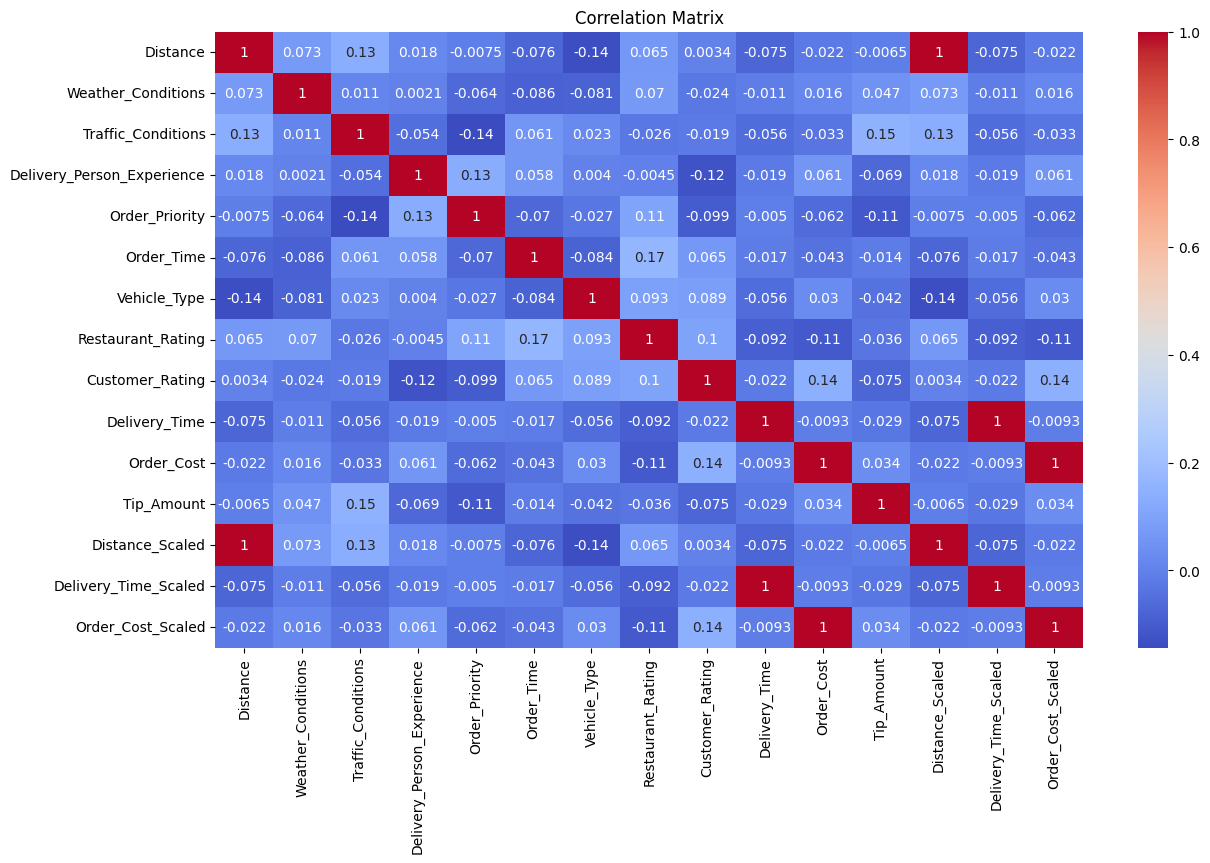

Correlation of features with Delivery_Time : 
Restaurant_Rating            -0.091855
Distance                     -0.075143
Distance_Scaled              -0.075143
Traffic_Conditions           -0.055840
Vehicle_Type                 -0.055576
Tip_Amount                   -0.029154
Customer_Rating              -0.021952
Delivery_Person_Experience   -0.019098
Order_Time                   -0.017476
Weather_Conditions           -0.010518
Order_Cost_Scaled            -0.009307
Order_Cost                   -0.009307
Order_Priority               -0.004982
Delivery_Time_Scaled          1.000000
Delivery_Time                 1.000000
Name: Delivery_Time, dtype: float64


In [335]:
correlation_matrix = d.corr(numeric_only=True)
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Table
correlation_with_target = correlation_matrix['Delivery_Time'].sort_values()
print("Correlation of features with Delivery_Time : ")
print(correlation_with_target)

Outliers -> some values that are either too big or too small than the most of the values in that column

They affect the output soo much<br>
Output that should have come is affected

Z-score or IQR method is used to remove outliers

In [336]:
d

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Traffic_Condisions,Distance_Scaled,Delivery_Time_Scaled,Order_Cost_Scaled
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,1,4,1,1,2,4.1,3.0,26.22,1321.10,81.54,NaN,-1.454738,-1.487932,0.501852
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,3,1,8,0,3,2,4.5,4.2,62.61,152.21,29.02,NaN,1.439192,-0.264987,-1.634294
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,1,9,2,3,1,3.3,3.4,48.43,1644.38,64.17,NaN,-0.666417,-0.741529,1.092646
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,3,0,2,1,2,1,3.2,3.7,111.63,541.25,79.23,NaN,0.335835,1.382411,-0.923323
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,2,6,0,3,1,3.5,2.8,32.38,619.81,2.34,NaN,-0.700119,-1.280915,-0.779755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,3,2,8,1,3,1,4.7,4.0,50.39,1432.26,66.34,NaN,1.805512,-0.675660,0.704997
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,2,1,8,0,3,0,3.0,3.6,90.54,1720.25,40.27,NaN,-0.792431,0.673647,1.231298
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,2,2,4,1,1,1,2.9,3.4,73.20,1356.58,5.10,NaN,1.335157,0.090908,0.566692
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,1,2,9,0,3,2,3.9,4.8,53.94,354.39,85.25,NaN,1.840679,-0.556356,-1.264810


To see outliers clearly using box plot

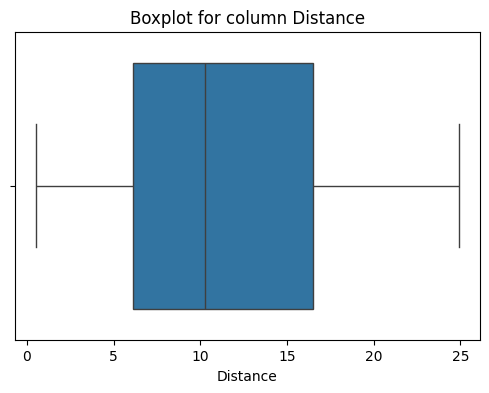

In [337]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=d['Distance'])
plt.title('Boxplot for column Distance')
plt.show()

No outliers for column Distance

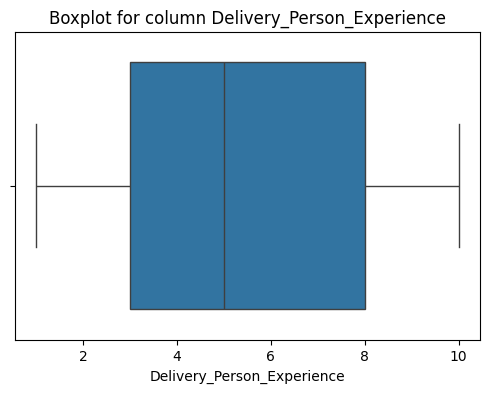

In [338]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=d['Delivery_Person_Experience'])
plt.title('Boxplot for column Delivery_Person_Experience')
plt.show()

No outliers for column Delivery_Person_Experience

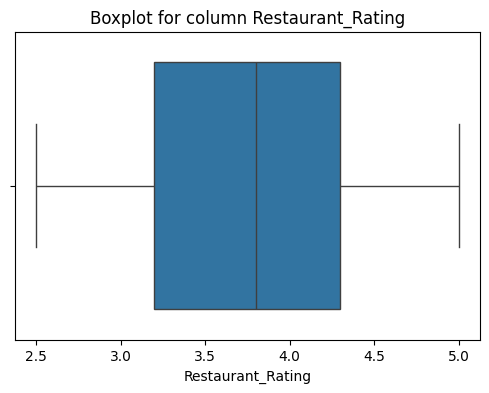

In [339]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=d['Restaurant_Rating'])
plt.title('Boxplot for column Restaurant_Rating')
plt.show()

No outliers for column Restaurant_Rating

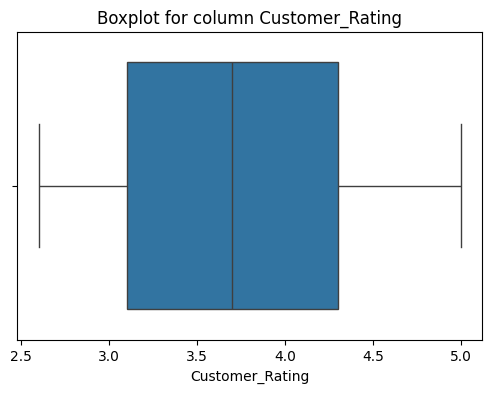

In [340]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=d['Customer_Rating'])
plt.title('Boxplot for column Customer_Rating')
plt.show()

No outliers for column Customer_Rating

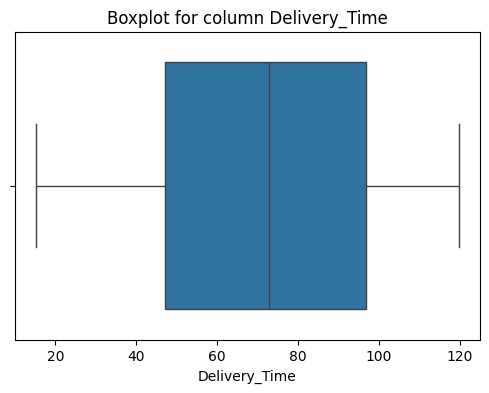

In [341]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=d['Delivery_Time'])
plt.title('Boxplot for column Delivery_Time')
plt.show()

No outliers for column Delivery_Time

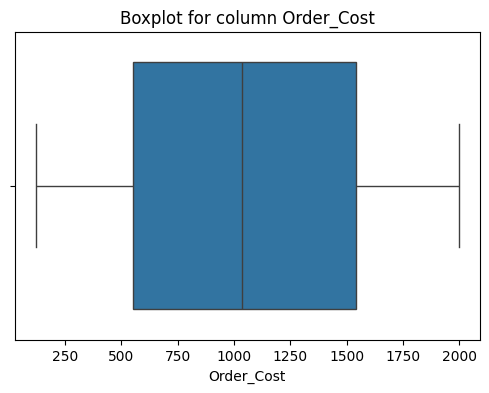

In [342]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=d['Order_Cost'])
plt.title('Boxplot for column Order_Cost')
plt.show()

No outliers for column Order_Cost

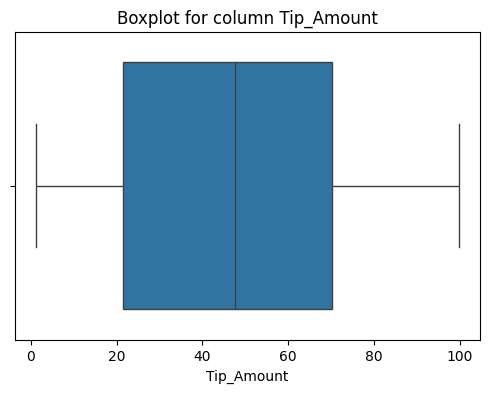

In [343]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=d['Tip_Amount'])
plt.title('Boxplot for column Tip_Amount')
plt.show()

No outliers for column Tip_Amount

None of the columns have outliers

<h3>Step 3 - Feature Engineering</h3>

In [344]:
def haversine_formula(coords_array1, coords_array2):
    lat1 = coords_array1[:,0]
    lon1 = coords_array1[:,1]
    lat2 = coords_array2[:,0]
    lon2 = coords_array2[:,1]
    # Convert decimal degrees to radians 
    lat1=np.radians(lat1)
    lon1=np.radians(lon1)
    lat2=np.radians(lat2)
    lon2=np.radians(lon2)
    # Haversine formula 
    lat_diff = lat2 - lat1 
    lon_diff = lon2 - lon1 
    a = np.sin(lat_diff/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(lon_diff/2)**2
    c = 2 * np.asin(np.sqrt(a)) 
    r = 6371  # Radius of earth in km
    return c * r

def parse_location(loc_str):
    # Remove parentheses and split by comma
    lat, lon = loc_str.strip("()").split(",")
    return float(lat), float(lon)

coords_array1 = d['Customer_Location'].apply(parse_location).tolist()
coords_array1 = np.array(coords_array1)

coords_array2 = d['Restaurant_Location'].apply(parse_location).tolist()
coords_array2 = np.array(coords_array2)

d['Calculated_Distance'] = haversine_formula(coords_array1, coords_array2)

In [345]:
d[['Calculated_Distance']]

,Calculated_Distance
0,775.651198
1,1042.385597
2,476.220706
3,389.912629
4,806.505886
...,...
195,670.130652
196,558.891202
197,106.686689
198,880.580093


In [346]:
d

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Traffic_Condisions,Distance_Scaled,Delivery_Time_Scaled,Order_Cost_Scaled,Calculated_Distance
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,1,4,1,1,2,4.1,3.0,26.22,1321.10,81.54,NaN,-1.454738,-1.487932,0.501852,775.651198
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,3,1,8,0,3,2,4.5,4.2,62.61,152.21,29.02,NaN,1.439192,-0.264987,-1.634294,1042.385597
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,1,9,2,3,1,3.3,3.4,48.43,1644.38,64.17,NaN,-0.666417,-0.741529,1.092646,476.220706
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,3,0,2,1,2,1,3.2,3.7,111.63,541.25,79.23,NaN,0.335835,1.382411,-0.923323,389.912629
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,2,6,0,3,1,3.5,2.8,32.38,619.81,2.34,NaN,-0.700119,-1.280915,-0.779755,806.505886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,3,2,8,1,3,1,4.7,4.0,50.39,1432.26,66.34,NaN,1.805512,-0.675660,0.704997,670.130652
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,2,1,8,0,3,0,3.0,3.6,90.54,1720.25,40.27,NaN,-0.792431,0.673647,1.231298,558.891202
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,2,2,4,1,1,1,2.9,3.4,73.20,1356.58,5.10,NaN,1.335157,0.090908,0.566692,106.686689
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,1,2,9,0,3,2,3.9,4.8,53.94,354.39,85.25,NaN,1.840679,-0.556356,-1.264810,880.580093


In [347]:
d["Order_Time"].unique()

array([1, 3, 2, 0])

In [348]:
print(np.sum(d['Order_Time']==0))
print(np.sum(d['Order_Time']==1))
print(np.sum(d['Order_Time']==2))
print(np.sum(d['Order_Time']==3))

39
59
57
45


In [349]:
d.loc[(d['Order_Time'] == 1) | (d['Order_Time'] == 2), 'Hour_Type'] = 'Rush Hour'
d.loc[(d['Order_Time'] == 0) | (d['Order_Time'] == 3), 'Hour_Type'] = 'Non-Rush Hour'
d[['Hour_Type']]

,Hour_Type
0,Rush Hour
1,Non-Rush Hour
2,Non-Rush Hour
3,Rush Hour
4,Non-Rush Hour
...,...
195,Non-Rush Hour
196,Non-Rush Hour
197,Rush Hour
198,Non-Rush Hour


In [350]:
# Setting numeric values to column Hour_Type
Hour_Type_map = {'Non-Rush Hour': 0, 'Rush Hour': 1}
d['Hour_Type'] = d['Hour_Type'].map(Hour_Type_map)
d[['Hour_Type']]

,Hour_Type
0,1
1,0
2,0
3,1
4,0
...,...
195,0
196,0
197,1
198,0


<h1>Phase 2<br>Predictive Modeling
</h1>

<h3>Step 4 - Linear Regression Model
</h3>

In [351]:
d

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,...,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Traffic_Condisions,Distance_Scaled,Delivery_Time_Scaled,Order_Cost_Scaled,Calculated_Distance,Hour_Type
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,1,4,1,1,2,...,3.0,26.22,1321.10,81.54,NaN,-1.454738,-1.487932,0.501852,775.651198,1
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,3,1,8,0,3,2,...,4.2,62.61,152.21,29.02,NaN,1.439192,-0.264987,-1.634294,1042.385597,0
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,1,9,2,3,1,...,3.4,48.43,1644.38,64.17,NaN,-0.666417,-0.741529,1.092646,476.220706,0
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,3,0,2,1,2,1,...,3.7,111.63,541.25,79.23,NaN,0.335835,1.382411,-0.923323,389.912629,1
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,2,6,0,3,1,...,2.8,32.38,619.81,2.34,NaN,-0.700119,-1.280915,-0.779755,806.505886,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,3,2,8,1,3,1,...,4.0,50.39,1432.26,66.34,NaN,1.805512,-0.675660,0.704997,670.130652,0
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,2,1,8,0,3,0,...,3.6,90.54,1720.25,40.27,NaN,-0.792431,0.673647,1.231298,558.891202,0
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,2,2,4,1,1,1,...,3.4,73.20,1356.58,5.10,NaN,1.335157,0.090908,0.566692,106.686689,1
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,1,2,9,0,3,2,...,4.8,53.94,354.39,85.25,NaN,1.840679,-0.556356,-1.264810,880.580093,0


In [352]:
features=['Calculated_Distance', 'Order_Priority', 'Hour_Type', 'Traffic_Conditions', 'Distance', 'Weather_Conditions', 'Order_Time', 'Vehicle_Type']
x = d[features]
y = d['Delivery_Time'].values.reshape(-1,1)

In [353]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [354]:
model=LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [355]:
y_pred=model.predict(x_test)
y_pred

array([[65.38769861],
       [69.91274107],
       [76.85336904],
       [70.38494607],
       [73.17633753],
       [75.13550136],
       [74.60017305],
       [70.70943681],
       [79.05965283],
       [65.72732621],
       [61.58958746],
       [68.54998666],
       [63.02809109],
       [79.96379449],
       [75.15506435],
       [66.55010947],
       [65.01215338],
       [68.94450298],
       [64.00757063],
       [77.0237123 ],
       [72.77246244],
       [66.73099907],
       [66.75165826],
       [67.10549902],
       [69.54848976],
       [68.5129306 ],
       [68.4822748 ],
       [68.89987917],
       [64.36055246],
       [75.85486299],
       [70.98672602],
       [70.15976751],
       [74.13732224],
       [69.20527439],
       [68.15818663],
       [76.71161811],
       [73.29715265],
       [72.52772064],
       [65.38620191],
       [79.20417865]])

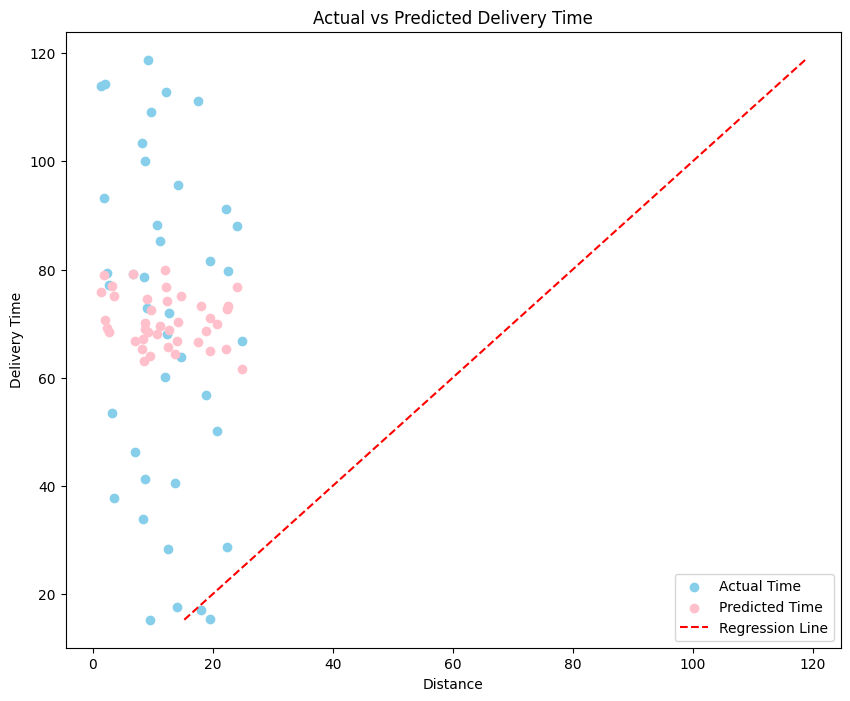

In [384]:
plt.figure(figsize=(10,8))
plt.scatter(x_test['Distance'], y_test, color='skyblue', label='Actual Time')
plt.scatter(x_test['Distance'], y_pred, color='pink', label='Predicted Time')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Regression Line')  # Reference line
plt.xlabel('Distance')
plt.ylabel('Delivery Time')
plt.legend()
plt.title('Actual vs Predicted Delivery Time')
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2_score = model.score(x_test, y_test)
mae = mean_absolute_error(y_test, y_pred)

print('Mean Squared Error : ', mse)
print('R sqyared (Accuracy for regression) : ', r2_score)
print('Mean Absolute Error : ', mae)

Mean Squared Error :  888.6648291609388
R sqyared :  0.03916826098779047
Mean Absolute Error :  25.33245221650145


<h3>Step 5 - Logistic Regression Model (for Categorization)</h3>